**Table of contents**<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Read Data](#toc2_)    
- [Data Selection](#toc3_)    
  - [Selecting 50% of the data](#toc3_3_)
  - [Drop rows with missing values](#toc3_2_)    
- [Removing Categorical Columns](#toc4_)    
- [Split Train and Test Data](#toc5_)    
- [Data Cleaning](#toc6_)    
  - [Impute missing numeric data](#toc6_1_)    
- [Data Normalization](#toc7_)    
- [Model training](#toc8_)    
  - [KNN](#toc8_1_)    
    - [Best model](#toc8_1_1_)    
  - [LVQ](#toc8_2_)
  - [Decision Tree](#toc8_3_)  
  - [MLP](#toc8_4_)
  - [SVM](#toc8_5_)  
  - [Stacking](#toc8_6_)  
  - [Random Forest](#toc8_7_)  

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

----

# <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from tqdm import tqdm

import pandas as pd
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 200

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate,train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report
import random
from random import seed,randrange
import requests
import io

# <a id='toc2_'></a>[Read Data](#toc0_)

In [3]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/Zuluke/Projetos-AM/main/spotify_activity/dataset.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

dataset = pd.read_csv(io.StringIO(download.decode('utf-8')))

## <a id='toc3_'></a>[Visualize Data](#toc0_)

In [6]:
dataset.shape
print(dataset.shape)
print('\n')
dataset.info()
print('\n')
dataset.head()

(114000, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liven

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# <a id='toc3_'></a>[Data Selection](#toc0_)

## <a id='toc3_3_'></a>[Selecting 50% of the data](#toc0_)

In [4]:
df, _, = train_test_split(dataset, train_size=0.5, stratify=dataset.track_genre)
df.track_genre.value_counts(normalize=True) * 100

track_genre
techno               0.877193
edm                  0.877193
disney               0.877193
samba                0.877193
latino               0.877193
turkish              0.877193
pagode               0.877193
mpb                  0.877193
piano                0.877193
electro              0.877193
metal                0.877193
sleep                0.877193
afrobeat             0.877193
alternative          0.877193
grindcore            0.877193
industrial           0.877193
club                 0.877193
drum-and-bass        0.877193
malay                0.877193
ambient              0.877193
rockabilly           0.877193
death-metal          0.877193
synth-pop            0.877193
dance                0.877193
goth                 0.877193
brazil               0.877193
tango                0.877193
groove               0.877193
sertanejo            0.877193
punk                 0.877193
deep-house           0.877193
detroit-techno       0.877193
minimal-techno       0.87719

## <a id='toc3_2_'></a>[Drop rows with missing values](#toc0_)

In [5]:
df.dropna(inplace=True, axis=0, how='any')

# <a id='toc4_'></a>[Removing Categorical Columns](#toc0_)

In [6]:
categorical_columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature']
df = df.drop(categorical_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57000 entries, 109074 to 40999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        57000 non-null  int64  
 1   duration_ms       57000 non-null  int64  
 2   danceability      57000 non-null  float64
 3   energy            57000 non-null  float64
 4   loudness          57000 non-null  float64
 5   speechiness       57000 non-null  float64
 6   acousticness      57000 non-null  float64
 7   instrumentalness  57000 non-null  float64
 8   liveness          57000 non-null  float64
 9   valence           57000 non-null  float64
 10  tempo             57000 non-null  float64
 11  track_genre       57000 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 5.7+ MB


# <a id='toc5_'></a>[Split Train and Test Data](#toc0_)

In [7]:
def train_validation_test_split(df, target_column, validation_size=0.1, test_size=0.1, random_state=42):
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df[target_column])
    
    df_train, df_validation = train_test_split(df_train,
                                               test_size=validation_size/(1 - test_size),
                                               random_state=random_state,
                                               stratify=df_train[target_column])
    return df_train, df_validation, df_test  

In [8]:
df_train, df_validation, df_test = train_validation_test_split(df, "track_genre",0.2, 0.2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57000 entries, 109074 to 40999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        57000 non-null  int64  
 1   duration_ms       57000 non-null  int64  
 2   danceability      57000 non-null  float64
 3   energy            57000 non-null  float64
 4   loudness          57000 non-null  float64
 5   speechiness       57000 non-null  float64
 6   acousticness      57000 non-null  float64
 7   instrumentalness  57000 non-null  float64
 8   liveness          57000 non-null  float64
 9   valence           57000 non-null  float64
 10  tempo             57000 non-null  float64
 11  track_genre       57000 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 5.7+ MB


# <a id='toc6_'></a>[Data Cleaning](#toc0_)

## <a id='toc6_1_'></a>[Impute missing numeric data](#toc0_)

In [9]:
numeric_columns = df_train.select_dtypes(include=['number']).columns

numeric_imputer = SimpleImputer(strategy='median')
numeric_imputer.fit(df_train[numeric_columns])

df_train[numeric_columns] = numeric_imputer.transform(df_train[numeric_columns])
df_validation[numeric_columns] = numeric_imputer.transform(df_validation[numeric_columns])
df_test[numeric_columns] = numeric_imputer.transform(df_test[numeric_columns])

# <a id='toc7_'></a>[Data Normalization](#toc0_)

In [10]:
normalizer = MinMaxScaler()

normalizer.fit(df_train[numeric_columns])

df_train[numeric_columns] = normalizer.transform(df_train[numeric_columns])
df_validation[numeric_columns] = normalizer.transform(df_validation[numeric_columns])
df_test[numeric_columns] = normalizer.transform(df_test[numeric_columns])

# <a id='toc8_'></a>[Model training](#toc0_)

## <a id='toc8_1_'></a>[KNN Prof](#toc0_)

Distância manhattan: 100%|██████████| 40/40 [03:59<00:00,  5.99s/it]


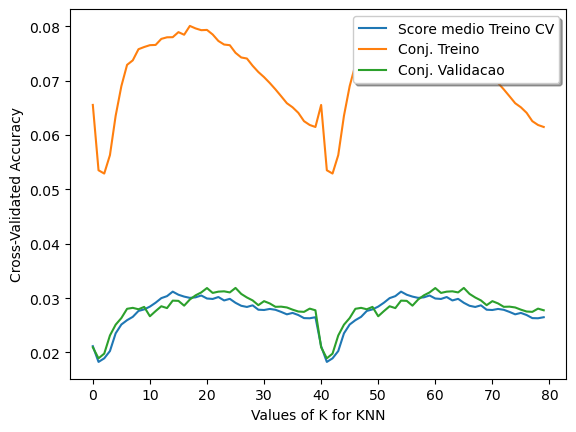

F1 de treinamento clf: 0.078
F1 de validação clf: 0.030
F1 de teste clf: 0.028


In [21]:
from sklearn.model_selection import cross_val_score
scaler = MinMaxScaler()

# Fazendo uma cópia de amostra do conjunto de dados
df_aj, _, = train_test_split(dataset, train_size=0.5, stratify=dataset.track_genre)

# Removendo colunas categóricas nominais e de palavras de baixo calão
df_aj = df_aj.drop(columns=['Unnamed: 0','track_id','energy','speechiness','acousticness','instrumentalness','liveness',
                                      'duration_ms','explicit' ,'artists', 'popularity','loudness','time_signature',
                                      'album_name', 'tempo','track_name','key', 'mode','danceability'])
df_aj = df_aj

df_aj.dropna(inplace=True, axis=0, how='any')

# Criando dicionários para converter labels em números e vice-versa
dict_label_num = {}
dict_num_label = {}
for index in range(len(df_aj.track_genre.unique())):
  dict_label_num[df_aj.track_genre.unique()[index]] = index
  dict_num_label[index] = df_aj.track_genre.unique()[index]

# Renomeando valores de track_genre
df_aj.track_genre = df_aj.track_genre.map(dict_label_num)

# Divisão de dados de atributos e classe
sptf_X = df_aj.drop(columns='track_genre') #caracteristicas
sptf_Y = df_aj.track_genre #classe

# Divisão em conjuntos de treino, teste e validação
sptf_X_train, sptf_X_test, sptf_Y_train, sptf_Y_test = train_test_split(sptf_X, sptf_Y, test_size=0.40, random_state=10)
sptf_X_test, sptf_X_valid, sptf_Y_test, sptf_Y_valid = train_test_split(sptf_X_test, sptf_Y_test, test_size=0.50, random_state=10)

sptf_X_train = sptf_X_train.values
sptf_X_test = sptf_X_test.values
sptf_X_valid = sptf_X_valid.values
sptf_Y_train = sptf_Y_train.values
sptf_Y_test = sptf_Y_test.values
sptf_Y_valid = sptf_Y_valid.values

# we create an instance of Neighbours Classifier and fit the data.
sptf_clf = KNeighborsClassifier()

# Construindo o espaco de busca por configuracoes do classificador
k_range = range(1, 81, 2) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
vet_distancias = ['euclidean', 'manhattan']
best_f1 = 0
#p_range = range(1, 198) #k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in vet_distancias:
  for j in tqdm(k_range, desc=f'Distância {k}'):
    knn = KNeighborsClassifier(n_neighbors=j, metric=k)
    scores = cross_val_score(knn, sptf_X_train, sptf_Y_train, cv=5, scoring='f1_weighted')
    k_scores_train.append(scores.mean())
    if scores.mean() > best_f1:
      sptf_clf = KNeighborsClassifier(n_neighbors=j, metric=k)
      best_f1 = scores.mean()
    knn.fit(sptf_X_train, sptf_Y_train)
    k_scores_train_full.append(f1_score(sptf_Y_train, knn.predict(sptf_X_train), average='weighted'))
    k_scores_valid.append(f1_score(sptf_Y_valid, knn.predict(sptf_X_valid), average='weighted'))

#treinando o classificador
sptf_clf = sptf_clf.fit(sptf_X_train, sptf_Y_train)

# plot to see clearly
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Score medio Treino CV', 'Conj. Treino', 'Conj. Validacao'),
           loc='upper right', shadow=True)
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("F1 de treinamento clf: %0.3f" %  f1_score(sptf_Y_train, sptf_clf.predict(sptf_X_train), average='weighted'))
print("F1 de validação clf: %0.3f" %  f1_score(sptf_Y_valid, sptf_clf.predict(sptf_X_valid), average='weighted'))
print("F1 de teste clf: %0.3f" %  f1_score(sptf_Y_test, sptf_clf.predict(sptf_X_test), average='weighted'))

## <a id='toc8_1_'></a>[KNN Veva](#toc0_)

In [13]:
#Div. de dados atributos e classe
df_cara_train = df_train[numeric_columns].values  #caracteristicas
df_clas_train = df_train['track_genre'].values #classe

df_cara_validation = df_validation[numeric_columns].values  #caracteristicas
df_clas_validation = df_validation['track_genre'].values #classe

df_cara_test = df_test[numeric_columns].values  #caracteristicas
df_clas_test = df_test['track_genre'].values #classe

In [22]:
knn = KNeighborsClassifier().fit(df_cara_train,df_clas_train)
param_grid = {
    'n_neighbors': np.arange(1,81,2),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(df_cara_train,df_clas_train)
print(grid.cv_results_['mean_test_score'],'\n\n')

[0.18046784 0.16947368 0.18020468 0.1854386  0.18944444 0.19403509
 0.19552632 0.19587719 0.19707602 0.19631579 0.19842105 0.19959064
 0.19847953 0.19827485 0.19842105 0.19842105 0.19850877 0.19748538
 0.1975731  0.19716374 0.19730994 0.19701754 0.19646199 0.19567251
 0.19576023 0.19450292 0.19561404 0.19523392 0.19429825 0.19502924
 0.1948538  0.19467836 0.19432749 0.19385965 0.19292398 0.19280702
 0.19146199 0.1925731  0.19269006 0.19260234 0.19292398 0.18488304
 0.19830409 0.20672515 0.21102339 0.21438596 0.2151462  0.21730994
 0.21918129 0.22108187 0.22108187 0.22078947 0.22134503 0.22096491
 0.2219883  0.22315789 0.22321637 0.22154971 0.22140351 0.22248538
 0.22201754 0.22219298 0.22219298 0.22140351 0.22143275 0.22239766
 0.22201754 0.22111111 0.22216374 0.2219883  0.22219298 0.22233918
 0.22210526 0.22087719 0.22096491 0.22134503 0.22070175 0.22140351
 0.22111111 0.22084795        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\

In [23]:
print(f'Melhor parametro: {grid.best_params_}')
print(f'Melhor resultado: {grid.best_score_}')

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 33}
Melhor resultado: 0.2232163742690058


In [24]:
df_clas_pred = grid.best_estimator_.predict(df_cara_test)

evaluation={
'accuracy': accuracy_score(df_clas_test, df_clas_pred),
'precision': precision_score(df_clas_test, df_clas_pred, average='weighted'),
'recall': recall_score(df_clas_test, df_clas_pred, average='weighted'),
'f1': f1_score(df_clas_test, df_clas_pred, average='weighted')
}

print(f'Dados de Teste')
print(evaluation)

Dados de Teste
{'accuracy': 0.2237719298245614, 'precision': 0.21200147275961662, 'recall': 0.2237719298245614, 'f1': 0.20801006982323267}


### <a id='toc8_1_1_'></a>[Best model](#toc0_)

In [ ]:
print(k, m,evaluation[(k,m)])

best_knn = KNeighborsClassifier(n_neighbors=45, metric='manhattan', n_jobs=-1)

best_knn.fit(df_train[numeric_columns], df_train['track_genre'])

print(classification_report(df_test['track_genre'], best_knn.predict(df_test[numeric_columns])))

45 manhattan {'cv_precision': 0.19161525965470105, 'cv_recall': 0.20199923711840534, 'cv_f1': 0.18488288371108258, 'cv_accuracy': 0.20190058479532164, 'train_f1': 0.24698349069443096, 'train_recall': 0.2637649986801499, 'train_precision': 0.2615227656614058, 'train_accuracy': 0.26359649122807016, 'validation_f1': 0.18803048676768094, 'validation_recall': 0.20412055878098662, 'validation_precision': 0.1928877606201788, 'validation_accuracy': 0.2036842105263158}
                   precision    recall  f1-score   support

         acoustic       0.15      0.25      0.19       105
         afrobeat       0.22      0.16      0.19       105
         alt-rock       0.06      0.05      0.05       101
      alternative       0.12      0.11      0.11       102
          ambient       0.20      0.21      0.20        99
            anime       0.08      0.07      0.07       100
      black-metal       0.29      0.33      0.31       105
        bluegrass       0.23      0.29      0.26        95
   

## <a id='toc8_2_'></a>[LVQ](#toc0_)

In [21]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

def calculate_metrics_per_class(actual, predicted, class_label):
    TP = 0  # Verdadeiros Positivos
    FP = 0  # Falsos Positivos
    FN = 0  # Falsos Negativos
    for i in range(len(actual)):
        if actual[i] == predicted[i] == class_label:
            TP += 1
        elif predicted[i] == class_label and actual[i] != class_label:
            FP += 1
        elif actual[i] == class_label and predicted[i] != class_label:
            FN += 1
    return TP, FP, FN

def macro_recall(actual, predicted):
    unique_classes = set(actual)
    recalls = []
    for class_label in unique_classes:
        TP, _, FN = calculate_metrics_per_class(actual, predicted, class_label)
        recall = TP / (TP + FN) if (TP + FN) else 0
        recalls.append(recall)
    return sum(recalls) / len(recalls) * 100.0

def macro_precision(actual, predicted):
    unique_classes = set(actual)
    precisions = []
    for class_label in unique_classes:
        TP, FP, _ = calculate_metrics_per_class(actual, predicted, class_label)
        precision = TP / (TP + FP) if (TP + FP) else 0
        precisions.append(precision)
    return sum(precisions) / len(precisions) * 100.0

def macro_f1_score(actual, predicted):
    precision = macro_precision(actual, predicted) / 100.0
    recall = macro_recall(actual, predicted) / 100.0
    return 2 * (precision * recall) / (precision + recall) * 100.0 if (precision + recall) else 0


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, dataset_validation, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores_cv = list()
	scores_val = list()
	
	scores_cv_recall = list()
	scores_cv_precision = list()
	scores_cv_f1 = list()

	scores_val_recall = list()
	scores_val_precision = list()
	scores_val_f1 = list()


	actual_validation = [row[-1] for row in dataset_validation]
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted_test, predicted_validation = algorithm(train_set, test_set, dataset_validation, *args)
		actual = [row[-1] for row in fold]
  
		accuracy_test = accuracy_metric(actual, predicted_test)
		scores_cv.append(accuracy_test)
  
		scores_cv_recall.append(macro_recall(actual, predicted_test))
		scores_cv_precision.append(macro_precision(actual, predicted_test))
		scores_cv_f1.append(macro_f1_score(actual, predicted_test))
  
		accuracy_val = accuracy_metric(actual_validation, predicted_validation)
		scores_val.append(accuracy_val)
		
		scores_val_recall.append(macro_recall(actual, predicted_validation))
		scores_val_precision.append(macro_precision(actual, predicted_validation))
		scores_val_f1.append(macro_f1_score(actual, predicted_validation))

	return scores_cv, scores_val, scores_cv_recall, scores_val_recall, scores_cv_precision, scores_val_precision, scores_cv_f1, scores_val_f1 

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]

# Make a prediction with codebook vectors
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]

# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
	return codebooks

# LVQ Algorithm
def learning_vector_quantization(train, test, validation, n_codebooks, lrate, epochs):
	codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
	predictions_test = list()
	predictions_validation = list()

	for row in test:
		output = predict(codebooks, row)
		predictions_test.append(output)
	for row in validation:
		output = predict(codebooks, row)
		predictions_validation.append(output)
  
	return predictions_test, predictions_validation

# Adjusting evaluation algorithm with cross validation split to consider F1-score
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in range(len(folds)):
		train_set = [folds[index] for index in range(len(folds)) if (not (index != fold))]
		train_set = sum(train_set, [])
		test_set = list()
		for row in folds[fold]:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in folds[fold]]
		f1score = f1_score(actual, predicted, average='weighted')
		scores.append(f1score)
	return scores

In [22]:
df_cara_train = df_train[numeric_columns].values  #caracteristicas
df_clas_train = df_train['track_genre'].values #classe

df_cara_validation = df_validation[numeric_columns].values  #caracteristicas
df_clas_validation = df_validation['track_genre'].values #classe

df_cara_test = df_test[numeric_columns].values  #caracteristicas
df_clas_test = df_test['track_genre'].values #classe

In [23]:
# Test LVQ on Spotify Dataset
n_folds = 5
learn_rate = 0.1
n_epochs = 20
n_codebooks = 30
# load and prepare data
scores_cv, scores_vali, scores_cv_recall, scores_val_recall, scores_cv_precision, scores_val_precision, scores_cv_f1, scores_val_f1= evaluate_algorithm(df_train, 
                                                                                                                                                        learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs)
print('Scores para cada fold: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

evaluation = {
    'cv_accuracy': sum(scores_cv)/float(len(scores_cv)),
    'validation_accuracy': sum(scores_vali)/float(len(scores_vali)),
    'cv_recall': sum(scores_cv_recall)/float(len(scores_cv_recall)),
    'validation_recall': sum(scores_val_recall)/float(len(scores_val_recall)),
    'cv_precision': sum(scores_cv_precision)/float(len(scores_cv_precision)),
    'validation_precision': sum(scores_val_precision)/float(len(scores_val_precision)),
    'cv_f1': sum(scores_cv_f1)/float(len(scores_cv_f1)),
    'validation_f1': sum(scores_val_f1)/float(len(scores_val_f1))
}


print(evaluation)


0.01 40
0.01 50
0.01 60
{(0.01, 40): {'cv_accuracy': 0.7865497076023391, 'validation_accuracy': 0.8771929824561402, 'cv_recall': 0.8771929824561402, 'validation_recall': 0.8771929824561402, 'cv_precision': 0.006899558838617011, 'validation_precision': 0.006899558838617011, 'cv_f1': 0.013687683109619469, 'validation_f1': 0.013687683109619469}, (0.01, 50): {'cv_accuracy': 0.8742690058479532, 'validation_accuracy': 0.8771929824561402, 'cv_recall': 0.8771929824561402, 'validation_recall': 0.8771929824561402, 'cv_precision': 0.00766902636708731, 'validation_precision': 0.00766902636708731, 'cv_f1': 0.015203534847939409, 'validation_f1': 0.015203534847939409}, (0.01, 60): {'cv_accuracy': 0.9239766081871345, 'validation_accuracy': 0.8771929824561402, 'cv_recall': 0.8771929824561402, 'validation_recall': 0.8771929824561402, 'cv_precision': 0.008105057966553812, 'validation_precision': 0.008105057966553812, 'cv_f1': 0.016060478273497235, 'validation_f1': 0.016060478273497235}}
0.2 40
0.2 50
0.2

In [60]:
dataset_train = df_train.values.tolist()
dataset_test = df_test.values.tolist()

n_folds = 5
learn_rate = 0.1
n_epochs = 20
n_codebooks = 30

scores = evaluate_algorithm(dataset_train, learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs)
print('Scores para cada fold: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

print("Scores CV:", scores_cv)
print("Scores Validation:", scores_vali)
print("Scores CV Recall:", scores_cv_recall)
print("Scores Validation Recall:", scores_val_recall)
print("Scores CV Precision:", scores_cv_precision)
print("Scores Validation Precision:", scores_val_precision)
print("Scores CV F1:", scores_cv_f1)
print("Scores Validation F1:", scores_val_f1)

Scores CV: [0.804093567251462, 0.97953216374269, 1.0087719298245614, 0.8625730994152047, 0.8333333333333334]
Scores Validation: [0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403]
Scores CV Recall: [0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403]
Scores Validation Recall: [0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403]
Scores CV Precision: [0.00705345234431107, 0.008592387401251667, 0.008848876577408434, 0.0075664306966246025, 0.007309941520467837]
Scores Validation Precision: [0.00705345234431107, 0.008592387401251667, 0.008848876577408434, 0.0075664306966246025, 0.007309941520467837]
Scores CV F1: [0.013994376804956552, 0.01701807726207077, 0.017521006162823476, 0.01500344570659872, 0.01449905756125852]
Scores Validation F1: [0.013994376804956552, 0.01701807726207077, 0.017521006162823476, 0.01500344570659872, 0.01449905756125852]


## <a id='toc8_3_'></a>[Decision Tree](#toc0_)

## <a id='toc8_4_'></a>[MLP](#toc0_)

## <a id='toc8_5_'></a>[SVM](#toc0_)

In [15]:
#Div. de dados atributos e classe
df_cara_train = df_train[numeric_columns].values  #caracteristicas
df_clas_train = df_train['track_genre'].values #classe

df_cara_validation = df_validation[numeric_columns].values  #caracteristicas
df_clas_validation = df_validation['track_genre'].values #classe

df_cara_test = df_test[numeric_columns].values  #caracteristicas
df_clas_test = df_test['track_genre'].values #classe

In [16]:
class_svm = SVC().fit(df_cara_train,df_clas_train)

In [17]:
lista_kernels=['poly']
lista_c =[2,3]
lista_gamma = [2,3,4]

# Criando um dicionário com os hiperparâmetros e valores a serem testados
param_grid = {'kernel': lista_kernels,'C': lista_c, 'gamma':lista_gamma}

In [18]:
grid = GridSearchCV(class_svm, param_grid, cv=5, scoring='accuracy')
grid.fit(df_cara_train,df_clas_train)

In [36]:
grid.cv_results_['mean_test_score']

array([0.23959782, 0.24529967, 0.24655703, 0.24743428, 0.24910085,
       0.2461184 , 0.17243205, 0.24614763, 0.2496857 , 0.25003663,
       0.25120619, 0.24933483, 0.24588455, 0.17181803, 0.24822371,
       0.25141093, 0.25392558, 0.25322383, 0.24965652, 0.24518281,
       0.1715256 , 0.25117696, 0.25418874, 0.25462738, 0.25339931,
       0.25018284, 0.24287283, 0.17140864, 0.25448113, 0.2567034 ,
       0.25576777, 0.25237586, 0.24731738, 0.23977326, 0.17120395,
       0.2579023 , 0.25857481, 0.25576782, 0.25217119, 0.24605999,
       0.23573809, 0.17088231, 0.26281478, 0.25585556, 0.24801923,
       0.24097225, 0.23056255, 0.22348627, 0.17041447])

In [37]:
print(f'Melhor parametro: {grid.best_params_}')
print(f'Melhor resultado: {grid.best_score_}')
#lista_kernels=['linear','rbf']
#lista_c =[2,3,4,5,7,10,100]
#lista_gamma = [2,3,4,5,7,10,100]
#Melhor parametro: {'C': 100, 'gamma': 2, 'kernel': 'rbf'}
#Melhor resultado: 0.26281478175137607

Melhor parametro: {'C': 100, 'gamma': 2}
Melhor resultado: 0.26281478175137607


In [39]:
# Predizendo os rótulos dos dados de teste
df_clas_pred = grid.best_estimator_.predict(df_cara_test)

evaluation={
'accuracy': accuracy_score(df_clas_test, df_clas_pred),
'precision': precision_score(df_clas_test, df_clas_pred, average='weighted'),
'recall': recall_score(df_clas_test, df_clas_pred, average='weighted'),
'f1': f1_score(df_clas_test, df_clas_pred, average='weighted')
}

print(f'Dados de Teste')
print(evaluation)

Dados de Teste
{'accuracy': 0.26570175438596494, 'precision': 0.2596195645386902, 'recall': 0.26570175438596494, 'f1': 0.2578082413357941}


## <a id='toc8_6_'></a>[Stacking](#toc0_)

## <a id='toc8_7_'></a>[Random Forest](#toc0_)